# OSM data analysis of Restaurants in Kathmandu

This python notebook analyses restaurant data within Kathmandu. First, OSM data within a given geojson bounds is extracted using the `osmnx` package. After this, by making requests to the Overpass API, we look at the latest date at which each entity is modified. Finally, after joining these two datasets, we generate summary statisics and time series plots to understand attribute coverage and data recency.

In [11]:
import os
import numpy as np
import requests
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap


boundary_file = "kathmandu.geojson"
tags = {"amenity": "restaurant"}
filename = "restaurants"
completeness_tags = ["name", "opening_hours", "phone","email"]

In [12]:
kathmandu_valley = gpd.read_file(boundary_file)

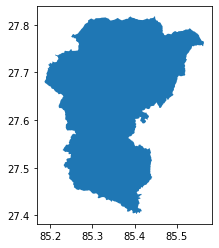

In [13]:
# create the plot
kathmandu_valley.plot()
north=kathmandu_valley.bounds['maxy'].values.item()
south=kathmandu_valley.bounds['miny'].values.item()
east=kathmandu_valley.bounds['maxx'].values.item()
west=kathmandu_valley.bounds['minx'].values.item()

In [14]:
osm_data=ox.geometries_from_bbox(north, south, east, west,tags)
timestamp = pd.DataFrame({'unique_id': [], 'timestamp': []})

entitylist = osm_data['unique_id'].to_list()
for entity in entitylist:
    index = entitylist.index(entity)
    overpass_url = "http://overpass-api.de/api/interpreter"
    feat_type = entity.split("/")[0]
    feat_id = entity.split("/")[1]
    query = f'[out:json][timeout:25];({feat_type}({feat_id}););out meta;'
    r = requests.get(overpass_url, params={'data': query})
    try:
        element = r.json()['elements'][0]
        timestamp = timestamp.append({'unique_id': entity, 'timestamp': element['timestamp']}, ignore_index=True)
        print(str(index) +" __ "+ str(entity) +" __ "+ element['timestamp'])
    except:
        print("Exception: " + str(entity))
        
del(osm_data["geometry"])
final = pd.merge(osm_data, timestamp, how='inner', on='unique_id')        
# final.to_csv(path_or_buf=filename, sep=",", index=False)

/home/arogya/projects/c2m2/osm_analysis/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0 __ node/313140391 __ 2012-10-19T08:13:37Z
1 __ node/432195178 __ 2017-03-25T11:44:12Z
2 __ node/558559377 __ 2010-05-06T18:22:28Z
3 __ node/560500319 __ 2020-10-06T09:22:19Z
4 __ node/564125542 __ 2009-11-14T20:11:00Z
5 __ node/568545483 __ 2015-01-31T08:03:50Z
6 __ node/616689295 __ 2015-12-01T21:18:14Z
7 __ node/616689516 __ 2010-01-19T14:00:08Z
8 __ node/669249210 __ 2017-07-12T07:03:20Z
9 __ node/669259323 __ 2015-05-14T10:51:40Z
10 __ node/669530474 __ 2013-10-25T21:17:46Z
11 __ node/671207878 __ 2020-11-27T21:10:14Z
12 __ node/671528357 __ 2018-12-06T04:16:22Z
13 __ node/708987886 __ 2018-06-04T08:13:11Z
14 __ node/943246325 __ 2013-02-22T08:26:43Z
15 __ node/1045848953 __ 2010-12-18T19:12:40Z
16 __ node/1349658488 __ 2012-10-10T08:24:31Z
17 __ node/1349658498 __ 2017-09-22T14:15:04Z
18 __ node/1350468491 __ 2017-06-16T09:42:24Z
19 __ node/1390372808 __ 2013-02-22T08:04:55Z
20 __ node/1417852754 __ 2013-07-18T09:29:35Z
21 __ node/1496652901 __ 2019-06-05T15:54:35Z
22 __ node/14

177 __ node/2089705044 __ 2019-07-29T17:54:53Z
178 __ node/2090613253 __ 2013-01-01T06:23:38Z
179 __ node/2090620860 __ 2013-01-01T06:53:36Z
180 __ node/2091834009 __ 2013-01-02T06:25:20Z
181 __ node/2091834010 __ 2013-09-09T04:45:27Z
182 __ node/2097794105 __ 2015-07-17T06:42:36Z
183 __ node/2122383300 __ 2018-11-26T10:53:39Z
184 __ node/2122384471 __ 2017-05-27T07:22:15Z
185 __ node/2127154507 __ 2013-01-25T08:14:49Z
186 __ node/2127168040 __ 2019-07-28T16:36:46Z
187 __ node/2127192048 __ 2013-01-25T09:07:50Z
188 __ node/2127247379 __ 2019-04-28T15:37:38Z
189 __ node/2127657061 __ 2013-01-25T16:02:02Z
190 __ node/2128601996 __ 2015-02-13T10:41:33Z
191 __ node/2141203076 __ 2016-12-28T11:31:07Z
192 __ node/2152851362 __ 2020-12-01T17:50:02Z
193 __ node/2152922729 __ 2013-02-13T08:19:18Z
194 __ node/2160902984 __ 2013-02-18T11:01:30Z
195 __ node/2164905855 __ 2019-08-02T09:46:39Z
196 __ node/2164947762 __ 2015-07-17T06:42:48Z
197 __ node/2164947771 __ 2015-07-17T06:42:00Z
198 __ node/2

352 __ node/3479423301 __ 2015-04-26T17:50:50Z
353 __ node/3479503200 __ 2015-04-26T18:25:54Z
354 __ node/3482195837 __ 2015-05-09T10:37:36Z
355 __ node/3485645024 __ 2016-12-02T17:04:03Z
356 __ node/3486241998 __ 2015-05-22T05:18:22Z
357 __ node/3486836081 __ 2016-08-15T02:13:36Z
358 __ node/3488413713 __ 2015-04-30T09:13:39Z
359 __ node/3488413724 __ 2015-04-30T09:13:40Z
360 __ node/3488413735 __ 2015-04-30T09:13:41Z
361 __ node/3488413741 __ 2015-04-30T09:13:41Z
362 __ node/3488413745 __ 2015-04-30T09:13:41Z
363 __ node/3488601016 __ 2020-05-12T11:30:07Z
364 __ node/3491198828 __ 2015-05-01T14:29:34Z
365 __ node/3493200396 __ 2015-07-17T06:43:30Z
366 __ node/3502028799 __ 2015-05-07T00:39:43Z
367 __ node/3506388087 __ 2015-07-17T06:44:06Z
368 __ node/3506712466 __ 2015-05-09T10:37:34Z
369 __ node/3506712489 __ 2015-05-09T10:37:35Z
370 __ node/3508175173 __ 2015-05-10T08:31:18Z
371 __ node/3509030390 __ 2020-05-11T11:16:53Z
372 __ node/3560223529 __ 2015-05-31T06:56:11Z
373 __ node/3

527 __ node/4567990089 __ 2016-12-23T03:59:55Z
528 __ node/4573477556 __ 2016-12-26T15:48:18Z
529 __ node/4574896790 __ 2016-12-27T11:06:35Z
530 __ node/4576912089 __ 2020-10-17T06:27:29Z
531 __ node/4581570392 __ 2016-12-30T17:18:00Z
532 __ node/4582656192 __ 2016-12-31T14:19:35Z
533 __ node/4582838789 __ 2016-12-31T15:39:16Z
534 __ node/4582863863 __ 2017-01-02T15:23:34Z
535 __ node/4583631689 __ 2018-05-04T20:41:42Z
536 __ node/4583654589 __ 2017-01-01T10:32:06Z
537 __ node/4585505182 __ 2017-01-02T15:28:28Z
538 __ node/4586485589 __ 2017-01-03T06:31:54Z
539 __ node/4594057800 __ 2017-01-07T09:49:12Z
540 __ node/4594247791 __ 2017-01-07T12:17:20Z
541 __ node/4601425389 __ 2017-01-11T11:04:36Z
542 __ node/4602982005 __ 2017-01-12T01:46:57Z
543 __ node/4603333802 __ 2017-01-12T08:26:53Z
544 __ node/4603453556 __ 2017-01-12T10:07:42Z
545 __ node/4603907793 __ 2017-01-12T15:42:51Z
546 __ node/4607692589 __ 2017-01-14T12:21:44Z
547 __ node/4607692789 __ 2018-03-17T17:26:11Z
548 __ node/4

702 __ node/4931756052 __ 2020-08-16T11:30:41Z
703 __ node/4931988229 __ 2017-06-23T08:21:46Z
704 __ node/4933638421 __ 2017-06-24T07:15:03Z
705 __ node/4934160723 __ 2017-06-24T14:41:22Z
706 __ node/4940122817 __ 2017-06-28T10:14:21Z
707 __ node/4956103088 __ 2018-11-11T08:33:26Z
708 __ node/4958521824 __ 2017-07-08T15:01:19Z
709 __ node/4959263123 __ 2018-12-17T06:03:04Z
710 __ node/4961425321 __ 2017-07-10T08:55:11Z
711 __ node/4963053321 __ 2017-07-11T04:39:01Z
712 __ node/4970090121 __ 2017-07-14T10:05:54Z
713 __ node/4973010021 __ 2017-07-16T04:08:42Z
714 __ node/4973067022 __ 2017-07-16T05:48:05Z
715 __ node/4974990563 __ 2017-07-17T09:46:30Z
716 __ node/4976683821 __ 2017-07-18T06:40:06Z
717 __ node/4979728521 __ 2017-07-19T14:25:22Z
718 __ node/4986123321 __ 2017-07-22T05:22:52Z
719 __ node/4986123421 __ 2017-07-22T05:22:53Z
720 __ node/4987784722 __ 2017-07-23T08:43:52Z
721 __ node/4994207639 __ 2017-07-26T08:14:48Z
722 __ node/4994207640 __ 2017-07-26T08:14:48Z
723 __ node/4

877 __ node/5629058023 __ 2018-05-19T17:45:25Z
878 __ node/5646803221 __ 2018-05-28T03:47:48Z
879 __ node/5648035021 __ 2018-05-28T16:29:22Z
880 __ node/5653183522 __ 2018-05-31T07:52:18Z
881 __ node/5658210222 __ 2018-06-02T08:35:06Z
882 __ node/5659694287 __ 2019-04-28T19:27:04Z
883 __ node/5664104521 __ 2018-06-04T16:14:28Z
884 __ node/5666339322 __ 2018-06-05T10:26:14Z
885 __ node/5675805222 __ 2018-06-08T15:44:56Z
886 __ node/5679228321 __ 2018-06-10T09:08:05Z
887 __ node/5679539037 __ 2019-06-18T10:35:54Z
888 __ node/5686624921 __ 2018-06-13T04:35:15Z
889 __ node/5709669579 __ 2018-06-21T21:36:01Z
890 __ node/5719737922 __ 2018-06-26T09:07:52Z
891 __ node/5731872122 __ 2018-07-01T10:22:09Z
892 __ node/5731872124 __ 2019-01-22T08:35:10Z
893 __ node/5732059321 __ 2018-07-01T13:24:34Z
894 __ node/5736075421 __ 2018-11-29T09:24:46Z
895 __ node/5736645521 __ 2019-05-23T12:45:58Z
896 __ node/5748519721 __ 2018-07-09T06:31:20Z
897 __ node/5755072321 __ 2018-07-12T02:07:45Z
898 __ node/5

1051 __ node/6499238736 __ 2019-05-25T07:01:35Z
1052 __ node/6499238754 __ 2019-05-25T07:01:35Z
1053 __ node/6499243417 __ 2019-05-25T07:01:36Z
1054 __ node/6499299152 __ 2020-11-28T06:37:56Z
1055 __ node/6505744586 __ 2019-05-28T09:41:23Z
1056 __ node/6505748985 __ 2019-05-28T09:41:27Z
1057 __ node/6514336085 __ 2019-06-01T00:43:24Z
1058 __ node/6547037197 __ 2019-06-14T08:55:25Z
1059 __ node/6547050835 __ 2019-06-14T08:59:41Z
1060 __ node/6548976939 __ 2019-06-15T08:51:02Z
1061 __ node/6588817189 __ 2019-07-04T12:49:44Z
1062 __ node/6621185445 __ 2019-07-16T19:59:29Z
1063 __ node/6632629895 __ 2019-07-20T02:37:14Z
1064 __ node/6634691288 __ 2019-07-21T05:25:23Z
1065 __ node/6634692787 __ 2019-07-21T05:25:26Z
1066 __ node/6645362885 __ 2019-12-22T03:56:32Z
1067 __ node/6651598834 __ 2019-08-24T16:56:24Z
1068 __ node/6665352686 __ 2019-07-31T10:18:51Z
1069 __ node/6673462886 __ 2019-08-02T07:15:29Z
1070 __ node/6673476186 __ 2019-08-02T07:15:15Z
1071 __ node/6740120723 __ 2020-05-20T11

1226 __ way/245075713 __ 2014-05-19T11:58:40Z
1227 __ way/245079084 __ 2013-11-07T15:48:56Z
1228 __ way/245261733 __ 2018-11-28T07:12:56Z
1229 __ way/245581433 __ 2015-05-03T02:36:19Z
1230 __ way/247575566 __ 2016-06-25T06:15:48Z
1231 __ way/249678052 __ 2015-05-06T20:01:26Z
1232 __ way/255389681 __ 2014-01-05T12:38:42Z
1233 __ way/255389683 __ 2014-01-05T12:38:42Z
1234 __ way/258727183 __ 2014-01-28T05:25:09Z
1235 __ way/271972659 __ 2018-10-17T05:42:39Z
1236 __ way/285870311 __ 2014-06-02T09:40:45Z
1237 __ way/293272584 __ 2014-07-18T08:58:40Z
1238 __ way/294270999 __ 2014-07-28T05:37:01Z
1239 __ way/300592055 __ 2014-10-27T17:04:46Z
1240 __ way/302696275 __ 2018-11-27T15:09:36Z
1241 __ way/303141045 __ 2014-09-13T08:12:47Z
1242 __ way/303571036 __ 2014-09-16T04:42:13Z
1243 __ way/303571453 __ 2014-09-16T04:48:39Z
1244 __ way/307822170 __ 2014-10-15T04:08:38Z
1245 __ way/309269111 __ 2017-06-12T09:26:48Z
1246 __ way/311771916 __ 2014-11-08T15:05:16Z
1247 __ way/313775529 __ 2014-11-2

## Tag completeness

In this section, the entire OSM dataset is checked for completeness based on availability of the following standard tags (key value pairs) for hotels. In addition, a completeness score is also assigned for each individual entity based on the availaibility of the following tags.   

| Information    | Key           | Value              |
|----------------|---------------|--------------------|
| Infrastructure |    amenity    |     restaurant     |
| Name           |      name     | Name of restaurant |
| Opening hours  | opening_hours |  Mo-Fr 10:00-17:00 |
| Phone          |     phone     |       Ph no.       |
| email          |     email     |    email address   |

In [15]:
completeness = pd.DataFrame({'tag': [], 'completeness_percentage': []})

total_entries = len(final)
for tag in completeness_tags:
    if tag in final.columns:
        nulls = final[tag].isna().sum()  
        completeness = completeness.append({'tag': tag,'completeness_percentage': ((total_entries - nulls)/total_entries)*100}, ignore_index=True)
    else:
        completeness = completeness.append({'tag': tag,'completeness_percentage': 0.0 }, ignore_index=True)
        

/home/arogya/projects/c2m2/osm_analysis/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 4 artists>

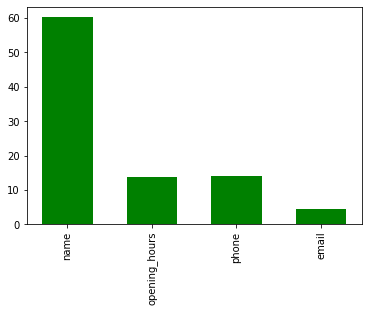

In [16]:
import matplotlib.pyplot as plt 
x = completeness.tag
y = completeness.completeness_percentage

plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])

In [17]:
completeness_scores =  pd.DataFrame({'unique_id': [], 'completeness_score': []})
for index, row in final.iterrows():
    total_tags = len(completeness_tags)
    count = 0
    
    for tag in completeness_tags:
        if tag in final.columns:
            if row[tag] is None:
                count = count
            else:
                count = count + 1
    completeness_scores = completeness_scores.append({'unique_id': row.unique_id, 'completeness_score': count/total_tags}, ignore_index=True)

final = pd.merge(final, completeness_scores, how='inner', on='unique_id')        
final.to_csv(path_or_buf=filename+".csv", sep=",", index=False)
completeness.to_csv(path_or_buf=filename+"_completeness.csv", sep=",", index=False)

## Data recency

In this section, the entire OSM dataset is checked for recency.

<BarContainer object of 106 artists>

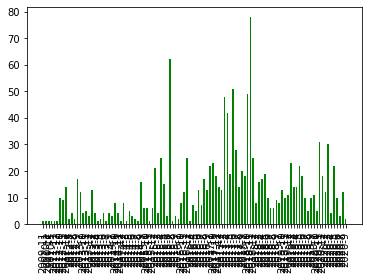

In [18]:
final.timestamp = pd.to_datetime(final.timestamp)
final['YearMonth'] =final['timestamp'].apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))
# final.groupby('YearMonth')
counts = final.value_counts(subset=['YearMonth']).rename_axis('unique_values').reset_index(name='counts')
counts = counts.sort_values(by="unique_values")
counts.to_csv(path_or_buf=filename+"_counts.csv", sep=",", index=False)

x = counts.unique_values
y = counts.counts

plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])

<BarContainer object of 12 artists>

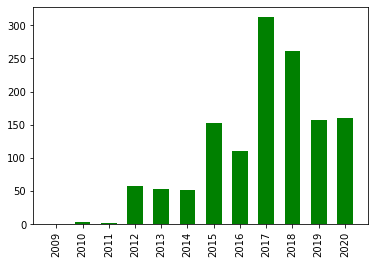

In [19]:
final.timestamp = pd.to_datetime(final.timestamp)
final['Year'] = final['timestamp'].apply(lambda x: '{year}'.format(year=x.year))
# final.groupby('YearMonth')

year_counts = final.value_counts(subset=['Year']).rename_axis('unique_values').reset_index(name='counts')
year_counts = year_counts.sort_values(by="unique_values")


x = year_counts.unique_values
y = year_counts.counts


plt.xticks(rotation=90) 
plt.bar(x, y, tick_label = x, 
        width = 0.6, color = [ 'green'])